# The Key to A Better Wide Receiver
By: Jenny Zhang, Marcus Kang, Joshua Chang, Daniel Lee

# Introduction

This project provides an analysis on the NFL and Fantasy Football rankings. The dataset we are using is public information that is kept by the NFL and Fantasy Football sites, including statistics on players and average draft positions by fantasy football league players. For those who are unfamiliar with Fantasy Football a short summary is that it is a game involving a league of players who draft NFL players to be a part of their own team that will compete based on a points system against other people who are in the league on a weekly basis. Many of these leagues involve sums of money, which is why players try their best to do their research and figure out which players will be the best. This includes "breakout players" who are players that the majority of fantasy players did not expect to do as well as they did and ended up with a much higher rank than they were drafted on average. 

My first findings on the relationship between the average draft position and postseason rankings are being used to determine whether the ADP is a trusted influence when choosing draft picks. From our regression fit, there is an estimated 1 change of Postseason ranking per ADP which is ideally expected but the intercept of the line is 64. There seems to be a linear correlation but the values are off by 64 positions. This indicates that players can use the ADP as a value to be considered but won't give precise information on when a player should be drafted. 

My second finding looked into the relationship between the postseason ranking and statistics of Wide Receivers. From our correlation matrix, there is a greatest relationship between postseason ranking and 

# Data Description

## We are primarily using two datasets for our data analysis: wr_df - contains data on performance of wide receivers and full_df - contains data on performance of all positions
- Player: First and last name in string 
- Year: Year of the Football season 
- Y/R: Yards per reception 
- YBC/R: Yards before contact with an opponent per reception
- AIR/R: Distance the ball traveled in the air per reception 
- YAC/R: Yards after catch per reception 
- YACON/R: yards after contact per reception 
- 10+YDS: Number of successful plays that were greater than 10 yards 
- 20+YDS: Number of successful plays that were greater than 20 yards 
- 30+YDS: Number of successful plays that were greater than 30 yards 
- 40+YDS: Number of successful plays that were greater than 40 yards 
- 50+YDS: Number of successful plays that were greater than 50 yards 
- Preseason rank - Ranking before the season started
- ADP - Average draft position 
- PPG - average points per game 
- Points - Total points scored 
- Position - position the player is in 


# Pre-registered Analyses

## Hypothesis 1:
### Average Draft Position in Fantasy Football is a good indicator of post-season rank.

We will model the relationship between the ADP and post-season rank over the course of recent history. 
- Given that players every year have an average draft position due to fantasy football as well as a post-season rank based on their peformance their variability can be aggregated and plotted. 
- We will set a certain value for correlation before-hand to find if the adp values meet the threshold of correlation to be considered a valued source.

By learning about the degree of correlation between ADP and the player's post-season rank we will determine whether fantasy football players could trust these values when making picks. 

## Hypothesis 2: 
### Points and 10+ Yards are the best predictors of post-season rank for a wide receiver.

We will model the relationship between the different Wide Receiver statistics and their post-season ranks. 
- By analyzing the factors which indicate good post-season rank, I hope to learn about what statistics can be especially indicative of good performance. 
- A value greater than 0.5 would indicate there to be sign of correlation between that statistic and post-season rank.

Due to all football positions having very different metrics through which their plays are evaluated, we are only focusing on wide receivers in particular. In this way, this sort of hypothesis and analysis is helpful for understanding why certain players end up being more successful through a season and thus ranking higher.

## Hypothesis 3:
### Breakout Wide Receivers will see an improvement in similar statistics from the year prior to their breakout year. 

We will model the relationship between the statistics of a breakout player in the season before and during their breakout year. 
- By defining the breakout player, as someone who had an ADP greater than 150 and ended with an overall rank less than 50 we will be able to determine who fits this description.
- After getting the data on these few breakout players we will be able to utilize correlation matrices and regression modelling to determine what statistics impacted their post-season rank the most. 

By learning about what improvements make the greatest change in wide receiver ranking, players can better determine what part of their game they should improve on most to add more value to themselves. Also fantasy football players will gain a better idea on which players show potential when making their weekly rosters. 

# Data Analysis

## Data Cleaning

In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import linear_model
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import PolynomialFeatures

In [5]:
full_df = pd.read_csv("full_df.csv")

wr_df = pd.read_csv("wr_df.csv")
wr_df


,Player,Year,Y/R,YBC/R,AIR/R,YAC/R,YACON/R,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,Preseason_rank,ADP,Postseason_rank,Position,Points,Games,PPG
0,Cooper Kupp,2021,13.4,7.6,7.6,5.8,1.8,66.0,30.0,15.0,9.0,3.0,51.0,52.8,1.0,WR,439.5,17.0,25.9
1,Deebo Samuel,2021,18.9,8.0,8.0,11.0,3.8,52.0,24.0,13.0,10.0,6.0,87.0,88.5,10.0,WR,339.0,16.0,21.2
2,Ja'Marr Chase,2021,18.0,9.9,9.9,8.0,3.1,51.0,22.0,13.0,8.0,6.0,71.0,71.0,18.0,WR,304.6,17.0,17.9
3,Justin Jefferson,2021,14.9,10.5,10.5,4.4,1.4,67.0,27.0,11.0,5.0,2.0,25.0,26.5,12.0,WR,330.4,17.0,19.4
4,Davante Adams,2021,12.6,7.8,7.8,4.8,1.2,66.0,19.0,12.0,4.0,2.0,8.0,8.3,8.0,WR,344.3,16.0,21.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,Austin Collie,2013,10.5,9.8,9.8,0.7,0.0,3.0,0.0,0.0,0.0,0.0,324.0,296.0,450.0,WR,12.3,7.0,1.8
1027,Quinton Patton,2013,11.3,8.7,8.7,2.7,0.0,1.0,1.0,0.0,0.0,0.0,262.0,252.0,567.0,WR,1.0,5.0,0.2
1028,Lestar Jean,2013,8.8,8.0,8.0,0.8,0.0,2.0,0.0,0.0,0.0,0.0,366.0,358.0,492.0,WR,7.5,12.0,0.6
1029,Jon Baldwin,2013,9.3,7.3,7.3,2.0,0.0,1.0,0.0,0.0,0.0,0.0,250.0,246.3,511.0,WR,5.8,7.0,0.8


## Summary Statistics

### Relationship Between ADP and Post-Season Rank
Considering that ADP is a factor that Fantasy Football Players consider when choosing their draft picks, we decided to look into whether this is something that serious players should really consider when choosing their team. If ADP appears to be similar to Postseason Rank then their correlation value should be close to 1. 

With hundreds of players to do research on and no guarantee that you get the players that you want, ADP can be the most accessible piece of information that can help decide who to choose as a next pick. I aim to see whether players can trust the masses when forming their team. 

Number of Positions: 6


Text(0.5, 0, 'Positions')

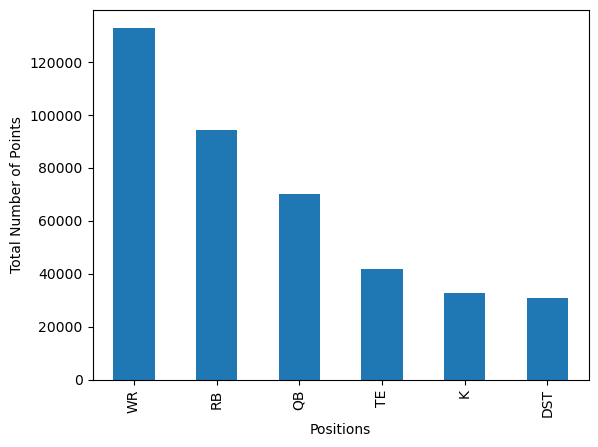

In [6]:
user_categories = full_df.groupby(['Position'])['Points'].sum().sort_values(ascending=False)
print("Number of Positions:", len(user_categories))
user_categories[:].plot.bar()
plt.ylabel('Total Number of Points')
plt.xlabel('Positions')

In [7]:
print("Standard deviation of points per position:", np.std(user_categories))

Standard deviation of points per position: 37057.22937329128


We hypothesize that the Average Draft Position would not be a good indicator of the Postseason rank of players. The ADP is based on predictions made by the Fantasy Football community who did or didn't do their own research. After performing a correlation test, this hypothesis and relationship were supported because as there was a correlation greater than 0.5 when looking at the past 9 years, there were only two years when the ADP predictions had less than a 0.5 correlation. 

<AxesSubplot:xlabel='Number of Players', ylabel='Fantasy Points'>

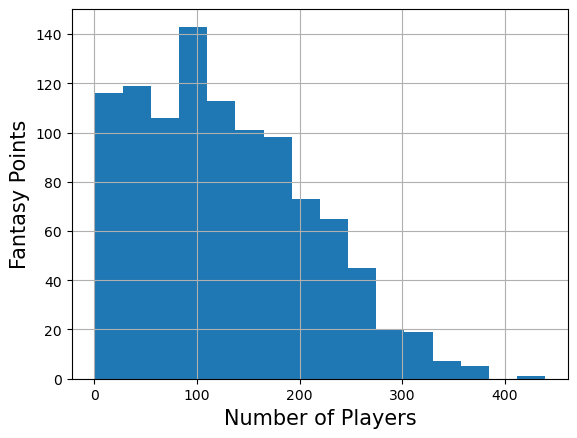

In [8]:
points_per_player = wr_df['Points']
 
plt.xlabel("Number of Players", fontsize=15)
plt.ylabel("Fantasy Points",fontsize=15)
points_per_player.hist(bins = 16)

Text(0, 0.5, 'Points Per Game')

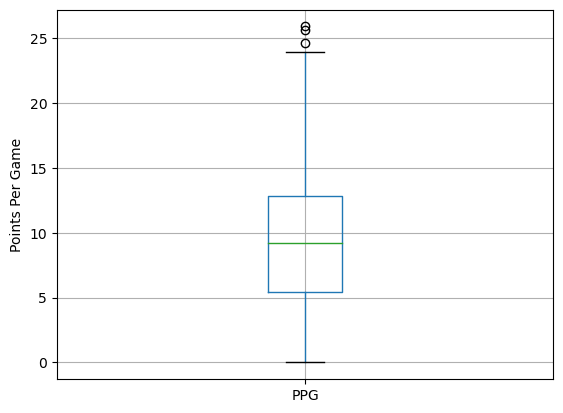

In [9]:
wr_df.boxplot(column ='PPG')
plt.ylabel('Points Per Game')

<AxesSubplot:xlabel='Year', ylabel='Points'>

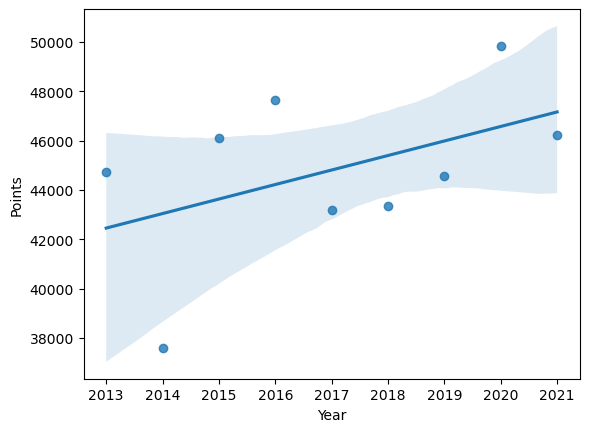

In [10]:
# sort the dataframe by year
by_year = full_df.groupby(['Year'])['Points'].sum()
by_year_df = by_year.to_frame()
points = by_year_df['Points'].tolist()
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
 
p_by_year_df = pd.DataFrame()
p_by_year_df['Year'] = years
p_by_year_df['Points'] = points
 
sns.regplot(x='Year', y='Points', data = p_by_year_df)


### Changes in Rank

<AxesSubplot:ylabel='Count'>

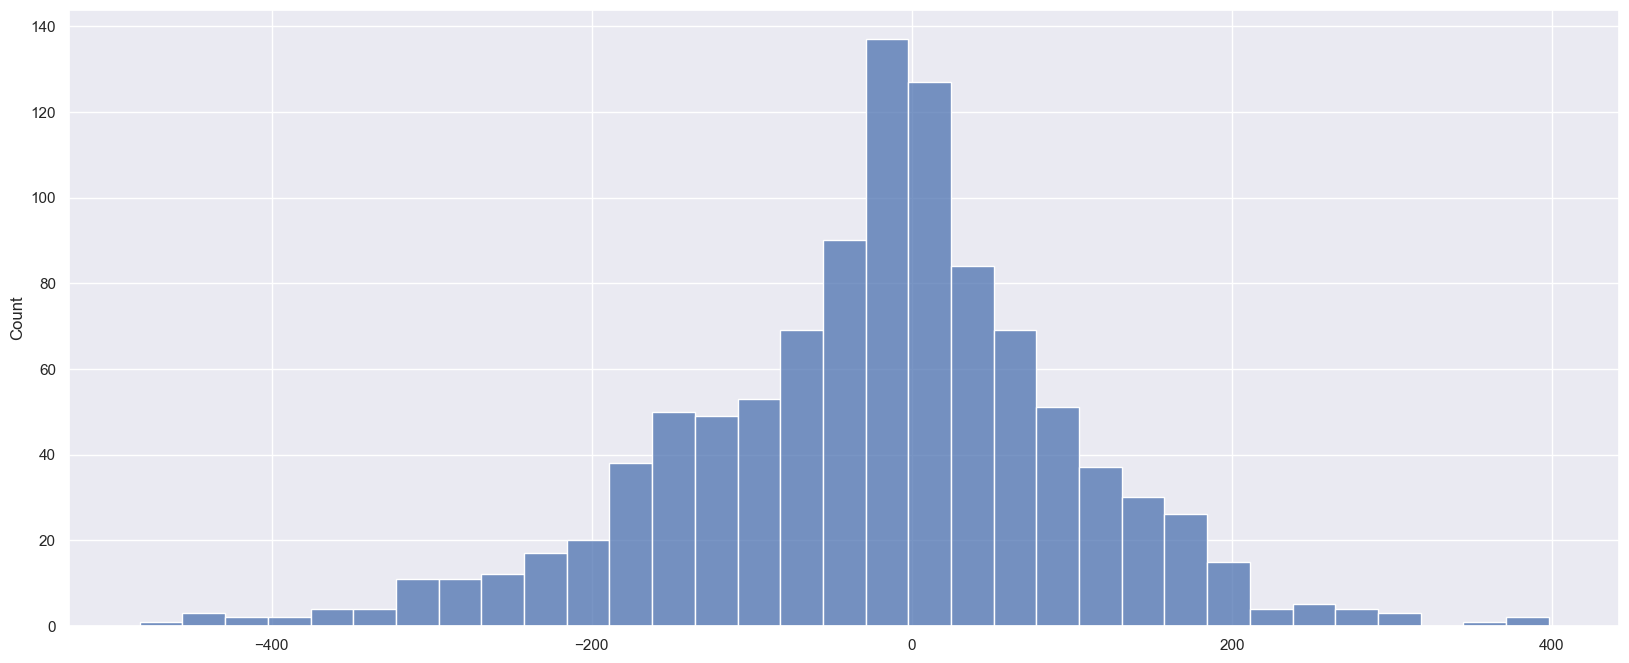

In [11]:
change_in_rank = wr_df['ADP'] - wr_df['Postseason_rank']

sns.set(rc={"figure.figsize":(20, 8)})
sns.histplot(data=change_in_rank)

Change in rank is distributed very normally with a mean slightly below 0 and a large standard deviation.

<AxesSubplot:>

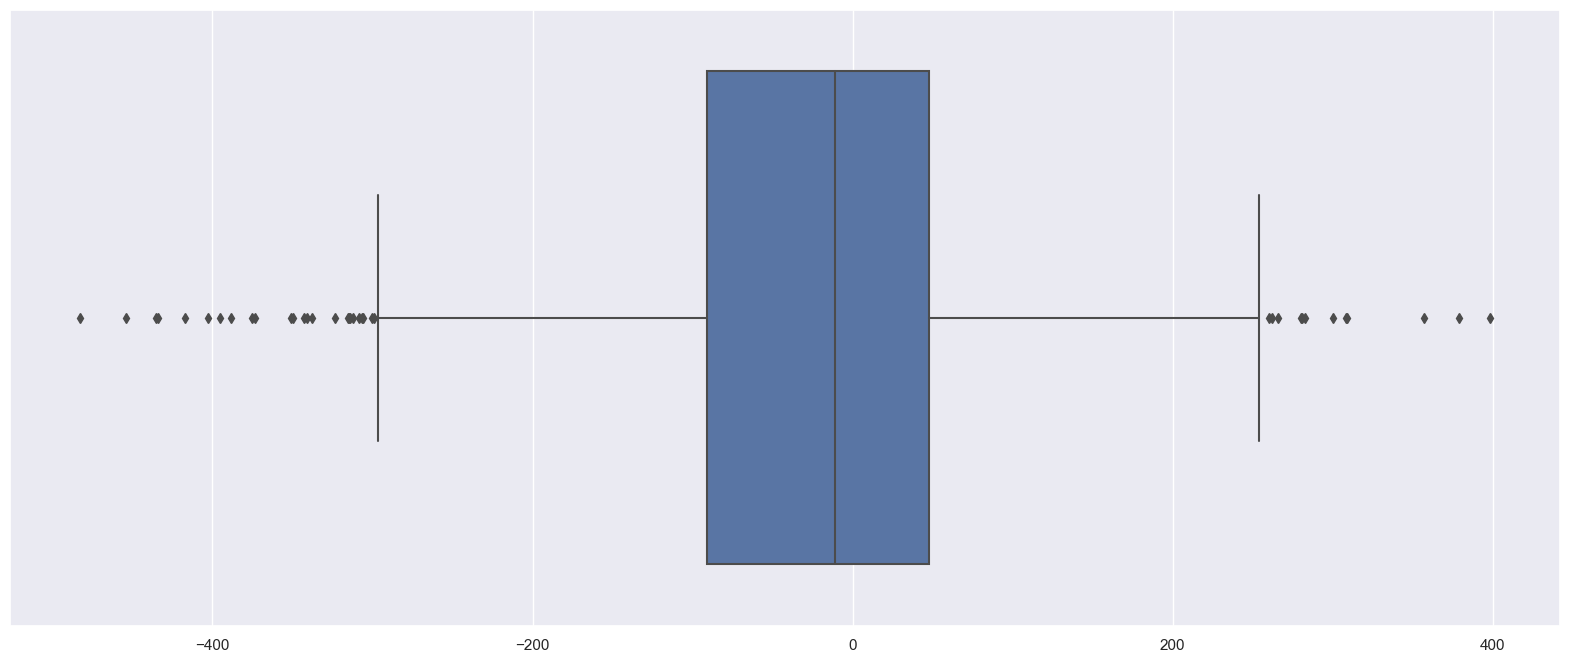

In [12]:
sns.boxplot(x=change_in_rank)

It can be noted in this boxplot that, on both ends (having a rank much better than preseason and the opposite), there are numerous outliers.

In [13]:
def remove_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

remove_outliers(change_in_rank).describe()

count    976.000000
mean     -17.476434
std       99.339654
min     -264.800000
25%      -80.400000
50%       -8.550000
75%       47.000000
max      216.000000
dtype: float64

The outliers were removed for cleaner summary statistics. Change in rank from Post-season rank in comparison to ADP shows a relatively normal distribution with a large standard deviation of about 121 and a mean less than 0 of -17.476434, which indicates that on average, from the beginning of the season to the end of the season, a players' rank would drop around 17 places, for example they could start with better rank of 10, as lower is better, but end aroudn 27, which would mean a lower performance in comparison to expectation.

Furthermore, the large standard deviation of around 100 even after outliers were removed shows that there is not necessarily a clear trend for players when comparing ADP with Postseason_rank.

### Influencing Postseason Rank

In [14]:
wr_df[["Postseason_rank", "Y/R","YBC/R","AIR/R", "YAC/R", "YACON/R", "10+ YDS", "20+ YDS", "30+ YDS", "40+ YDS", "50+ YDS", "Preseason_rank", "ADP", "Points", "PPG"]].corr()

,Postseason_rank,Y/R,YBC/R,AIR/R,YAC/R,YACON/R,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,Preseason_rank,ADP,Points,PPG
Postseason_rank,1.000000,-0.182824,-0.100926,-0.100926,-0.161795,-0.086945,-0.905115,-0.831602,-0.707298,-0.588712,-0.474696,0.598468,0.598278,-0.934208,-0.870723
Y/R,-0.182824,1.000000,0.859476,0.859476,0.322265,0.099462,0.207087,0.368555,0.454461,0.457986,0.408264,-0.096476,-0.082844,0.159346,0.179660
YBC/R,-0.100926,0.859476,1.000000,1.000000,-0.206704,-0.108381,0.150853,0.276051,0.333779,0.327824,0.255614,-0.087981,-0.072740,0.085554,0.107633
AIR/R,-0.100926,0.859476,1.000000,1.000000,-0.206704,-0.108381,0.150853,0.276051,0.333779,0.327824,0.255614,-0.087981,-0.072740,0.085554,0.107633
YAC/R,-0.161795,0.322265,-0.206704,-0.206704,1.000000,0.391433,0.115976,0.193350,0.251396,0.268602,0.307462,-0.020852,-0.022947,0.145408,0.143533
YACON/R,-0.086945,0.099462,-0.108381,-0.108381,0.391433,1.000000,0.054153,0.089440,0.099211,0.082351,0.109269,-0.020855,-0.042920,0.082149,0.071362
10+ YDS,-0.905115,0.207087,0.150853,0.150853,0.115976,0.054153,1.000000,0.892164,0.724935,0.590610,0.464096,-0.615524,-0.620694,0.959286,0.886366
20+ YDS,-0.831602,0.368555,0.276051,0.276051,0.193350,0.089440,0.892164,1.000000,0.834700,0.686222,0.547840,-0.549939,-0.556228,0.893841,0.829782
30+ YDS,-0.707298,0.454461,0.333779,0.333779,0.251396,0.099211,0.724935,0.834700,1.000000,0.851521,0.690552,-0.457939,-0.464094,0.766346,0.706484
40+ YDS,-0.588712,0.457986,0.327824,0.327824,0.268602,0.082351,0.590610,0.686222,0.851521,1.000000,0.819605,-0.375009,-0.377723,0.643476,0.596133


From this chart it can be noted that certain parameters having significant correlation with Postseason Rank (< -0.5 or > 0.5 for preseason rank or ADP): Points, PPG (Points per Game), 10+ Yards, 20+ Yards, 30+ Yards, 40+ Yards, Preseason_rank, and ADP. However, 10+ YDS, 20+ YDS, 30+ YDS, and 40+ YDS all have a high covariance due to the nature of the statistic. Points and PPG also have a high covariance due to the nature of the statistic. To reduce, overfitting Points and 10+ YDS will be considered.

A major difficulty with fitting parameters to fit a model off of is that many game parameters in football for wide recievers do have some sort of covariance, which makes creating a model difficult for the high possibility of overfitting.

<AxesSubplot:xlabel='Points', ylabel='Postseason_rank'>

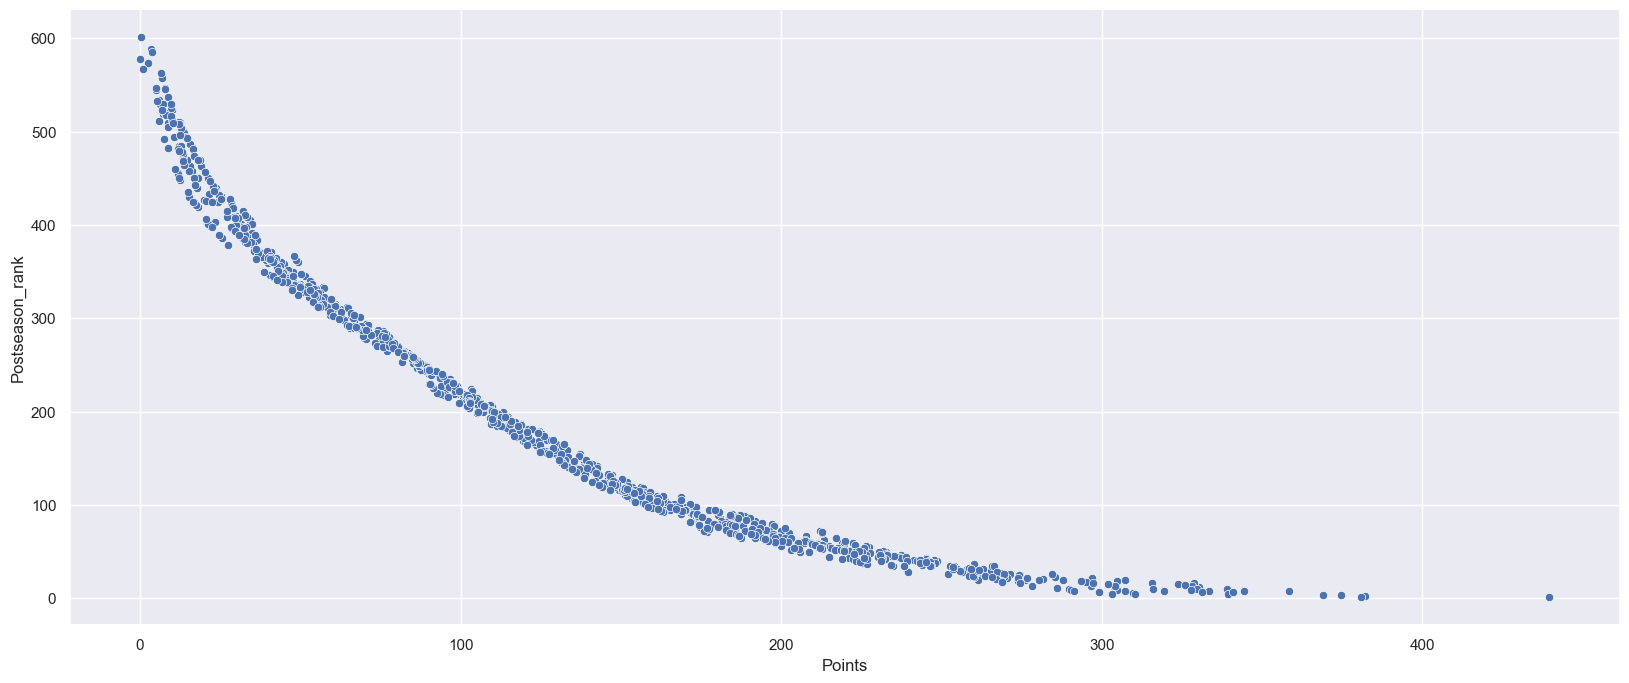

In [15]:
sns.scatterplot(data=wr_df, x="Points", y="Postseason_rank")

We ran a scatterplot to test the correlation between postseason rank and points. A very tight negative correlation between postseason rank and points can be seen from the above scatterplot. In interpretation, those of lower rank (meaning better performance) scored more points.

<AxesSubplot:xlabel='10+ YDS', ylabel='Postseason_rank'>

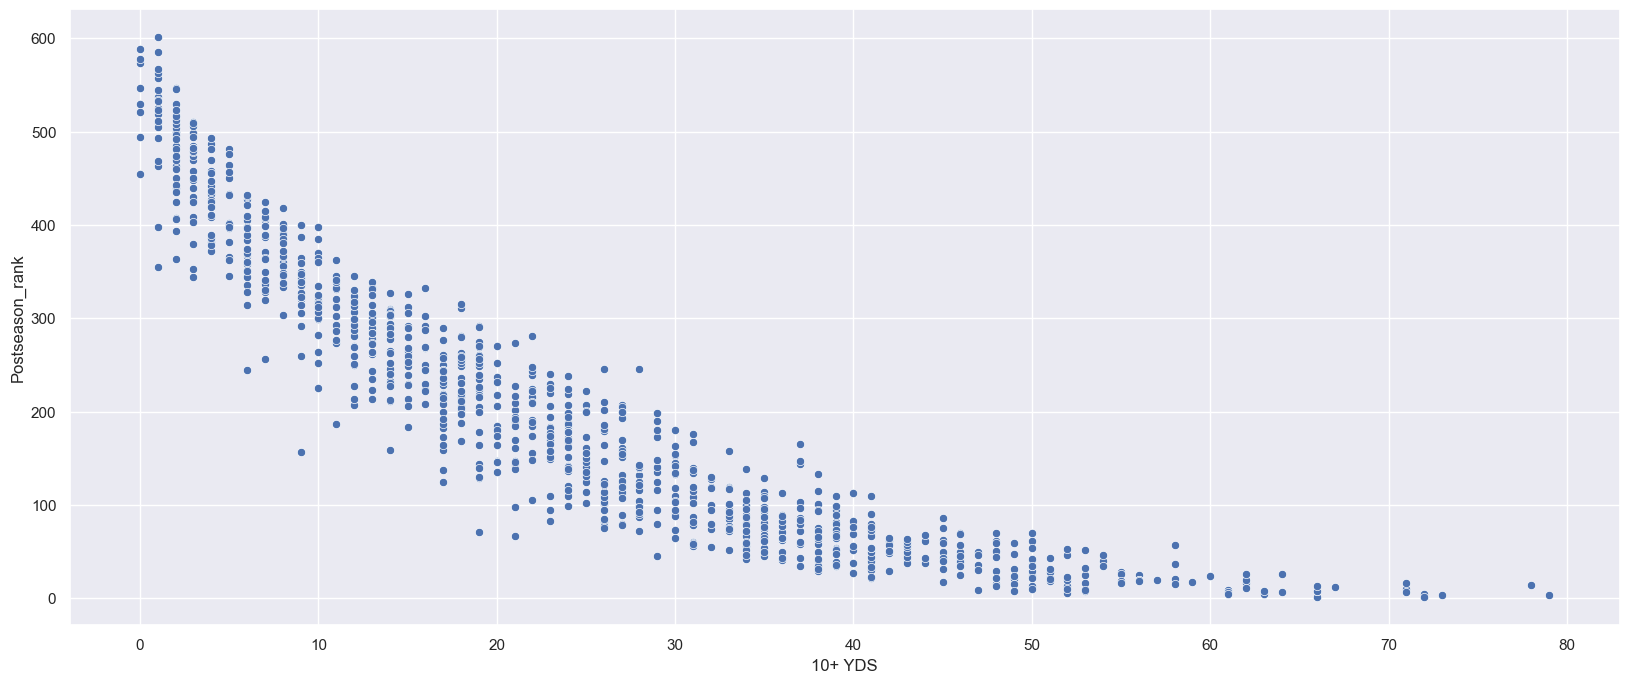

In [16]:
sns.scatterplot(data=wr_df, x="10+ YDS", y="Postseason_rank")

Correlation between postseason rank and points can be seen from the above scatterplot, though not as tight as with points.

### Scoring Points Over Time

## Statistics of breakout players throughout the years

In [17]:
cond_ = (wr_df["ADP"] > 150) & (wr_df["Postseason_rank"] < 50)
breakouts = wr_df.loc[cond_,:]

name = breakouts['Player'].values.tolist()
print(name)

#def player(name):
#display(wr_df.loc[wr_df['Player'] == name])

breakout_full = pd.DataFrame()

length = len(name)
for n in range(length):
    breakout_loop = wr_df.loc[wr_df['Player'] == name[n]]
    breakout_full = breakout_full.append(breakout_loop)
#     breakout_full = pd.concat([breakout_loop])

#display(breakout_full)
display(breakout_full)
breakout_full.shape


    #breakout_loop.append(breakout_full)

# display(breakout_full)

# breakout_loop.

['Hunter Renfrow', 'DeVante Parker', 'Tyler Lockett', 'Davante Adams', 'Michael Thomas', 'Doug Baldwin', 'Michael Crabtree', 'Odell Beckham Jr.', 'Julian Edelman']


/var/folders/3h/yl2n3z352gb0fr4mzw_rdmh40000gn/T/ipykernel_2678/2615623958.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  breakout_full = breakout_full.append(breakout_loop)
/var/folders/3h/yl2n3z352gb0fr4mzw_rdmh40000gn/T/ipykernel_2678/2615623958.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  breakout_full = breakout_full.append(breakout_loop)
/var/folders/3h/yl2n3z352gb0fr4mzw_rdmh40000gn/T/ipykernel_2678/2615623958.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  breakout_full = breakout_full.append(breakout_loop)
/var/folders/3h/yl2n3z352gb0fr4mzw_rdmh40000gn/T/ipykernel_2678/2615623958.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

,Player,Year,Y/R,YBC/R,AIR/R,YAC/R,YACON/R,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,Preseason_rank,ADP,Postseason_rank,Position,Points,Games,PPG
12,Hunter Renfrow,2021,10.1,5.7,5.7,4.4,1.1,41.0,10.0,2.0,1.0,1.0,332.0,296.0,30.0,WR,259.1,17.0,15.2
174,Hunter Renfrow,2020,11.7,5.7,5.7,6.0,1.9,30.0,7.0,3.0,2.0,1.0,225.0,168.0,163.0,WR,131.6,16.0,8.2
312,Hunter Renfrow,2019,12.3,6.2,6.2,6.1,3.2,24.0,7.0,3.0,2.0,2.0,284.0,275.0,151.0,WR,133.5,13.0,10.3
62,DeVante Parker,2021,12.9,10.3,10.3,2.6,1.2,22.0,7.0,3.0,1.0,0.0,147.0,152.0,222.0,WR,103.5,10.0,10.4
159,DeVante Parker,2020,12.6,9.7,9.7,2.8,1.3,35.0,10.0,1.0,0.0,0.0,64.0,62.3,98.0,WR,166.3,14.0,11.9
264,DeVante Parker,2019,16.7,13.0,13.0,3.7,1.3,54.0,21.0,9.0,7.0,2.0,207.0,172.5,40.0,WR,246.2,16.0,15.4
460,DeVante Parker,2018,12.9,9.0,9.0,3.9,1.5,11.0,3.0,3.0,1.0,0.0,119.0,129.4,313.0,WR,60.9,11.0,5.5
539,DeVante Parker,2017,11.8,8.1,8.1,3.6,0.9,30.0,9.0,4.0,0.0,0.0,62.0,61.4,153.0,WR,130.0,13.0,10.0
657,DeVante Parker,2016,13.3,9.1,9.1,4.2,1.9,29.0,9.0,4.0,4.0,3.0,101.0,104.3,116.0,WR,154.4,15.0,10.3
783,DeVante Parker,2015,19.0,15.2,15.2,3.8,1.3,20.0,9.0,6.0,2.0,0.0,141.0,147.3,237.0,WR,93.4,14.0,6.7


(54, 19)

In [18]:
breakout_full.describe()

,Year,Y/R,YBC/R,AIR/R,YAC/R,YACON/R,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,Preseason_rank,ADP,Postseason_rank,Points,Games,PPG
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,2017.259259,12.529630,8.362963,8.362963,4.162963,1.066667,34.425926,11.611111,4.962963,2.592593,1.074074,101.555556,98.718519,105.148148,197.025926,13.888889,13.931481
std,2.332584,2.117459,2.047391,2.047391,1.144354,0.697705,14.402046,5.644890,3.040376,1.937890,1.271633,92.239570,86.039730,106.731617,85.564554,3.396261,4.964737
min,2013.000000,5.500000,4.300000,4.300000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.700000,3.000000,6.200000,3.000000,2.100000
25%,2015.250000,11.300000,7.150000,7.150000,3.325000,0.625000,24.250000,7.250000,3.000000,1.000000,0.000000,38.250000,39.950000,30.250000,131.875000,13.250000,10.300000
50%,2017.000000,12.300000,8.100000,8.100000,4.150000,1.100000,35.500000,10.000000,4.500000,2.000000,1.000000,66.000000,67.050000,60.000000,217.550000,15.000000,14.450000
75%,2019.000000,13.300000,9.100000,9.100000,5.000000,1.475000,41.750000,16.750000,7.000000,3.000000,2.000000,155.250000,160.900000,152.500000,255.175000,16.000000,16.500000
max,2021.000000,19.000000,15.200000,15.200000,7.200000,3.200000,73.000000,22.000000,13.000000,8.000000,5.000000,346.000000,329.000000,529.000000,374.600000,17.000000,25.600000


In [19]:
breakout_full.corr()

,Year,Y/R,YBC/R,AIR/R,YAC/R,YACON/R,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,Preseason_rank,ADP,Postseason_rank,Points,Games,PPG
Year,1.000000,-0.094030,0.124524,0.124524,-0.385102,0.141054,0.113473,0.009235,0.001380,-0.068022,-0.095650,-0.191329,-0.219930,0.076084,0.045295,-0.032021,0.005147
Y/R,-0.094030,1.000000,0.848849,0.848849,0.326098,0.085994,0.088796,0.362466,0.468218,0.539138,0.467954,0.009671,0.012716,-0.134132,0.051680,0.151065,0.062673
YBC/R,0.124524,0.848849,1.000000,1.000000,-0.222298,-0.071678,-0.065555,0.201820,0.253476,0.333764,0.230081,-0.087380,-0.068981,0.063195,-0.129214,0.021647,-0.120184
AIR/R,0.124524,0.848849,1.000000,1.000000,-0.222298,-0.071678,-0.065555,0.201820,0.253476,0.333764,0.230081,-0.087380,-0.068981,0.063195,-0.129214,0.021647,-0.120184
YAC/R,-0.385102,0.326098,-0.222298,-0.222298,1.000000,0.278931,0.279855,0.307630,0.413370,0.403160,0.455727,0.170834,0.143282,-0.355257,0.327144,0.234374,0.334002
YACON/R,0.141054,0.085994,-0.071678,-0.071678,0.278931,1.000000,0.199726,0.184441,0.166625,0.080473,0.175092,-0.087954,-0.096227,-0.232554,0.206589,0.228525,0.141658
10+ YDS,0.113473,0.088796,-0.065555,-0.065555,0.279855,0.199726,1.000000,0.815297,0.656622,0.441027,0.255805,-0.314311,-0.347080,-0.858440,0.944530,0.630519,0.792763
20+ YDS,0.009235,0.362466,0.201820,0.201820,0.307630,0.184441,0.815297,1.000000,0.795084,0.619971,0.471961,-0.230443,-0.249693,-0.789490,0.827960,0.640363,0.639488
30+ YDS,0.001380,0.468218,0.253476,0.253476,0.413370,0.166625,0.656622,0.795084,1.000000,0.817190,0.649786,-0.271800,-0.291527,-0.613633,0.723103,0.463713,0.612065
40+ YDS,-0.068022,0.539138,0.333764,0.333764,0.403160,0.080473,0.441027,0.619971,0.817190,1.000000,0.839385,-0.092865,-0.123322,-0.468951,0.540405,0.325539,0.495751


From the correlation matrices above, the magnitudes of the correlation between Years and all other variables were relative small, except YAC/R.

<AxesSubplot:xlabel='Year', ylabel='YAC/R'>

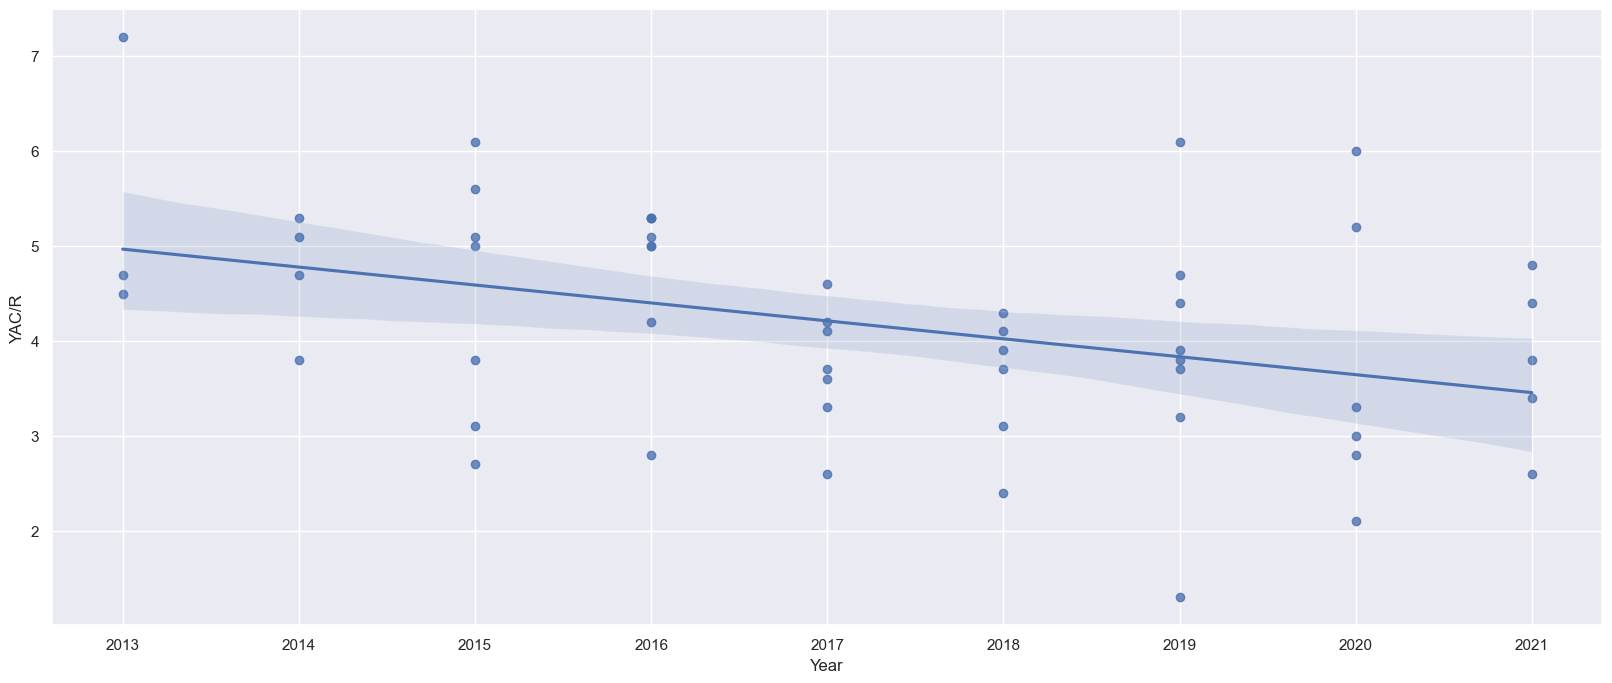

In [20]:
sns.regplot(data = breakout_full, x = "Year", y = "YAC/R", ci = 95)

# Predictor Model

In [22]:
def run_regression(names, training, testing, target):
    model = LinearRegression().fit(training[names], training[target])
    train_pred = model.predict(training[names])
    test_pred = model.predict(testing[names])
    train_mse = metrics.mean_squared_error(training[target], train_pred)
    test_mse = metrics.mean_squared_error(testing[target], test_pred)
    print('List:', names)
    print('Model Coefficient:', model.coef_)
    print('Model Intercept:', model.intercept_)
    print('Train RMSE:', np.sqrt(train_mse))
    print('Train MAE:', train_mse)
    print('Test RMSE:', np.sqrt(test_mse))
    print('Train MAE:', test_mse)

player_train, player_test = train_test_split(wr_df, test_size = 0.1, random_state = 2950)
variable_list = ['Y/R', 'YBC/R', 'AIR/R', 'YAC/R', 'YACON/R', '10+ YDS', '20+ YDS', '30+ YDS', '40+ YDS', '50+ YDS', 'Preseason_rank', 'ADP', 'Games', 'PPG', 'Points']
run_regression(variable_list, player_train, player_test, 'Postseason_rank')

List: ['Y/R', 'YBC/R', 'AIR/R', 'YAC/R', 'YACON/R', '10+ YDS', '20+ YDS', '30+ YDS', '40+ YDS', '50+ YDS', 'Preseason_rank', 'ADP', 'Games', 'PPG', 'Points']
Model Coefficient: [-5.30721666e-01 -3.12463010e-01 -3.12463010e-01 -6.33380511e-01
  8.85761016e-01 -6.27075410e-01  8.67797571e-01 -8.64308161e-01
  3.49184826e+00 -1.78332196e+00  2.08459107e-01 -2.04152932e-01
 -1.78647067e+01 -2.00510724e+01  1.55001182e-02]
Model Intercept: 643.5145141380815
Train RMSE: 40.349686105361265
Train MAE: 1628.0971688011841
Test RMSE: 39.91164315397808
Train MAE: 1592.9392592504857


## Postseason Rank Model

In [ ]:
multi_x = wr_df[['Points', '10+ YDS']]
multi_y = wr_df['Postseason_rank']

poly_model = PolynomialFeatures(degree=1)
poly_x_values = poly_model.fit_transform(multi_x)

poly_reg_model = sm.OLS(multi_y, poly_x_values).fit()
ypred = poly_reg_model.predict(poly_x_values)

In [ ]:
plt.figure(figsize=(20,8))
plt.scatter(wr_df['Postseason_rank'], ypred, c='crimson')

p1 = max(max(ypred), max(wr_df['Postseason_rank']))
p2 = min(min(ypred), min(wr_df['Postseason_rank']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## Model (2)

# Evaluation of Significance

## ADP - Postseason Model

In [ ]:
print("R-squared value for regression line is {score:.3f}".format(score = reg.score(users.ADP.values.reshape(-1,1), users.Postseason_rank)))

With a R-squared value of 0.362, our regression plot predicts 36.2% of the observed data(ADP) well. It is expected that the R-squared value would be a low value as ADP is known to not be a perfect indicator of post-season rank, but a value below 0.5 shows a very low relationship between the two values. This indicates that external factors contribute much more to predicting what the postseason rank is for a player. 

## Postseason Rank Model

In [ ]:
poly_reg_model.summary()

From the summary of the model, it has an r-squared value of 0.874, meaning that the model does fit observations to a good degree, though as mentioned above, overfitting was a significant problem that could be addressed in the future with the model due to the high level of covariance between the two parameters used. The p-value of points and ten yards were both extremely low, with points being smaller than ten yards, meaning that it was more informative when creating predictions.

In [ ]:
fig = sm.graphics.plot_regress_exog(poly_reg_model, 'Points')

A major concern was also the residual plot, which did not show scattered random points but was instead very fitted and showed shape. The curved pattern in the residual plot  indicates that the model captures the trend of some data points better than that of others for Points, particularly in this case with the lower and higher number of Points which show very high residual values.

In [ ]:
fig = sm.graphics.plot_regress_exog(poly_reg_model, 'Ten_Yards')

The residual plot for 10+ Yard plays was also similar, though a little more scattered and less fitted than that of Points.

## Model (2)

# Interpretations and Conclusions

## Postseason Rank Model

There appears to be a decently strong relationship between the variables of Points and number of 10+ Yard Plays, with high correlation. While it might be too quick to wholeheartedly agree with the hypothesis that these parameters can accurately predict the Postseason Rank a player might have, the model created can, to some degree of success, make a predicition with some similarity to real outcomes. The results of the model show that there is some validity in these two factors and their effect on Postseason Rank.

## Model (2)

## Conclusions

# Limitations

## General

The major limitation to our data are the non-quantifiable factors that can affect a player’s performance. These include factors such as injury that can occur at any point in the season or off-season and vary in severity, the chemistry between the wide receiver and his quarterback as better chemistry would allow for better overall performance, that a breakout player could be in their rookie season and not have any prior data, and the personal factors that might affect the players’ ability in games. These are all subjective factors that cannot be put down as data, thus limiting the accuracy of our analysis and predictions. 

We only looked back to 2013, as more advanced statistics started to be measured then. These advanced statistics include yards per reception (Y/R), yards before contact with an opponent per reception (YBC/R), the distance the ball traveled in the air per reception (AIR/R), yards after catch per reception (YAC/R),  yards after contact per reception (YACON/R), number of plays that were greater than a certain distance (10+ YDS, 20+ YDS, 30+ YDS, 40+ YDS, 50+ YDS). We believe that these statistics will give us a better understanding of the similar performance on a per reception basis between different breakout players compared to using more basic statistics such as total yards. 

As a result of wanting to look into the more advanced statistics, we are limited to up to the year 2013. Breakout players are something that don’t occur often which means that we won’t find many players that fit both our breakout player criteria and broke out after 2013. This is why we limited our data to only wide receivers, who historically have the most breakout players compared to any other position. By having more breakout players we would have more data to compare between each other and against current players. There are breakout players in other positions and data on them but only a fraction of how many players that breakout in the wide receiver position. 

## Postseason Rank Model

The model was limited by the metrics used, which were only related to Games. As all of the metrics were related to Games, many had high levels of covariance that made fitting a model very difficult. If further kinds of metrics for players could be compared as well, such as physical (height, weight, etc.), team (number of teams' wins that season, etc.) the model could have been more accurate and had less problems with overfitting that could make it much more accurate.

## Model (2)